# Can you shape the peloton?

[Puzzle link](https://thefiddler.substack.com/p/can-you-shape-the-peloton)

Earlier this month, I watched La Vuelta, one of the three grand tours of cycling (a trio that includes the Tour de France). I noticed the peloton—the main group of riders—took on an aerodynamic profile that sometimes looked like a triangle, sometimes looked like a rhombus, and sometimes looked somewhere in between.

For example, the figure below shows the four possible formations between a triangle and a rhombus when the peloton’s maximum width is four riders:

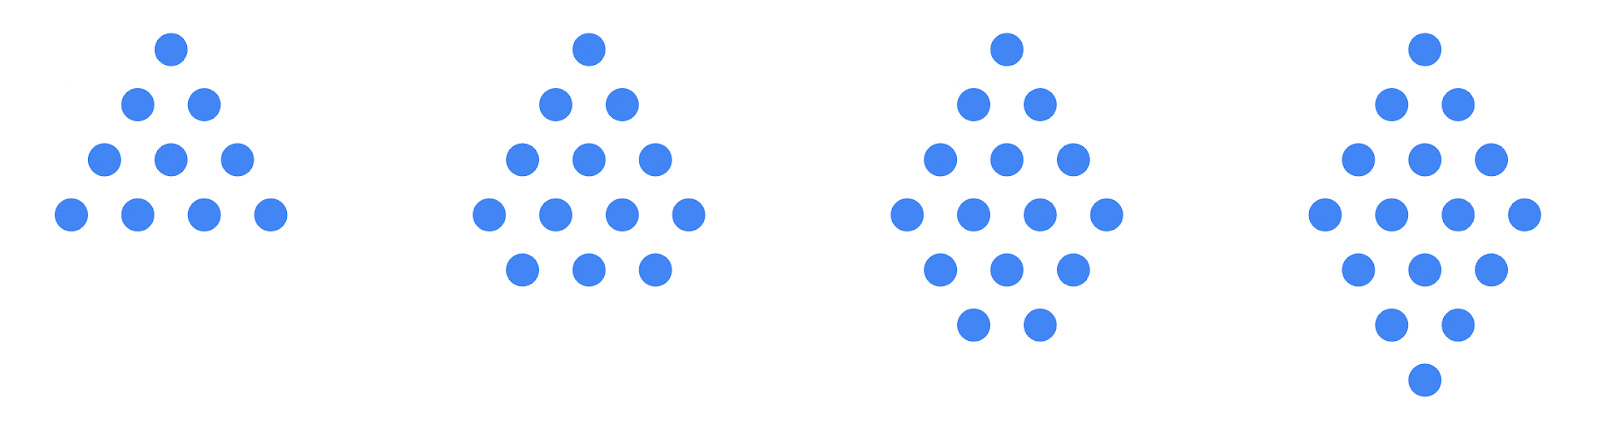

For certain numbers of riders, multiple formations like these are possible. In particular, there are two formations with 15 riders: a triangle that’s five riders wide at the base and an almost-rhombus that’s four riders wide in the middle, but missing the bottommost rider, as shown below.

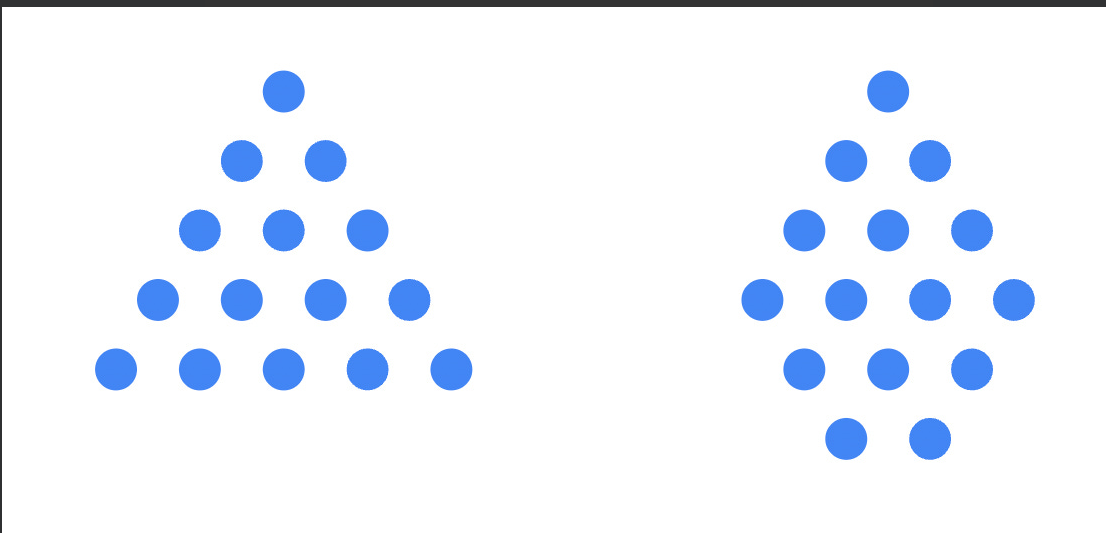

After 15, what is the next smallest number of riders that similarly has two distinct formations between a triangle and a rhombus?

# My submission

**Notes**

- I'll call a `base`, the maximum width in a shape - triangle or rhombus -  ; For example, in the image above the bases are respectively 5 to the left and 4 to the right


- an n-based triangle contains n(n+1)/2 dots; this can be proved by recurrence


- an n-based rhombus contains n² dots; proof: it is the addition of a n-based triangle and a (n-1) based triangle, hence n(n+1)/2 + (n-1)n/2 = n²

- I first thought that only rhombuses of base (n-1) had to be searched when working on triangles of base n, as the above image tends to indicate, but in fact after solving for (n -2)² < n(n+1)/2 it turns out that (n-2)-based rhombuses can also contain as many dots as n-based triangles whenever n > 8

- there is likely a lot of room for code refactoring; in the notebook I don't have the comfort of my code editor (linter + AI suggestions); here I force myself to think by myself so no copilot, and thus no visual help either

**Solving procedure**

Iterate over integers >= 16, let's call this the current number, and:

- determine the minimum and maximum base possible
- iterate over the candidate bases (see above) and the number of dots in the possible arrangements, if at least 2 (3 for the extra credit) found equal to the current number, record that then stop

**Optimizations**

It's likely there are some, both in the algo and the dataviz func, but that was not needed here

# Part 1

In [100]:
import matplotlib.pyplot as plt

## Helper functions

### Algo

In [187]:
def get_minimum_base(nb_dots: int) -> int:
    "Returns the minimum base for a (possibly partial) rhombus to contain `nb_dots` dots"
    n = 1
    while True:
        if n**2 >= nb_dots:
            return n
        n += 1
    

def get_maximum_base(nb_dots: int) -> int:
    "Returns the maximum base for a (possibly partial) rhombus to contain `nb_dots` dots"
    n = 0
    while True:
        if n*(n+1)/2 >= nb_dots:
            return n
        n += 1
        

def has_n_formations(nb_dots: int, nb_formations_min: int) -> bool:
    "Returns whether there are at least `nb_formations_min` valid formations that have `nb_dots` riders"
    min_base, max_base = get_minimum_base(nb_dots), get_maximum_base(nb_dots)
    valid_bases = []
    for base in range(min_base, max_base + 1):
        triangle_nb_dots = base * (base + 1) / 2
        if triangle_nb_dots == nb_dots:
            valid_bases.append(base)
            if len(valid_bases) == nb_formations_min:
                print(f"{nb_dots} riders is a solution with {nb_formations_min} formations")
                plot_formation(bases=valid_bases, total = nb_dots)
                return True
        to_add = 0
        for i in range(base - 1, 0, -1):
            to_add += i
            if triangle_nb_dots + to_add == nb_dots:
                valid_bases.append(base)
                if len(valid_bases) == nb_formations_min:
                    print(f"{nb_dots} riders is a solution with {nb_formations_min} formations")
                    plot_formation(bases=valid_bases, total = nb_dots)
                    return True
    return False

### DataViz

In [200]:
def plot_formation(bases:list[int], total:int, color='blue'):
    """Plots a (possibly partial) rhombus or triangle with dots inside."""
    # Create a figure and a grid of 1 row and 2 columns.
    fig, axes = plt.subplots(1, len(bases), figsize=(10, 5))
    y_level_base = 10  # height of the base; somewhat arbitrary
    for fig_ind, base in enumerate(bases): # iterate over formations
        x_base = list(range(1, base + 1))
        y_base = [y_level_base] * len(x_base)
        prev_row = x_base
        y_level = y_level_base
        # draw upper triangle
        xs, ys = x_base, y_base
        for row in range(base - 1):
            y_level += 1
            new_row = [(prev_row[i]+prev_row[i+1])/2 for i in range(len(prev_row)-1)]
            xs.extend(new_row)
            ys.extend([y_level] * len(new_row))
            prev_row = new_row
        # draw lower part (if any)
        x_base = list(range(1, base + 1))
        y_base = [y_level_base] * len(x_base)
        prev_row = x_base
        y_level = y_level_base
        while len(xs) < total:
            y_level -= 1
            new_row = [(prev_row[i]+prev_row[i+1])/2 for i in range(len(prev_row)-1)]
            xs.extend(new_row)
            ys.extend([y_level] * len(new_row))
            prev_row = new_row
            
        
        axes[fig_ind].scatter(xs, ys, color=color)
        axes[fig_ind].set_title(f"{base=}, riders={total}")
        axes[fig_ind].axis('off')

## Main function

In [191]:
def solve_p1():
    nb_solutions = 0
    current_nb_dots = 14
    while nb_solutions < 2:
        if has_n_formations(current_nb_dots, 2):
            nb_solutions += 1
        current_nb_dots += 1  

## Viewing results

15 riders is a solution with 2 formations
36 riders is a solution with 2 formations


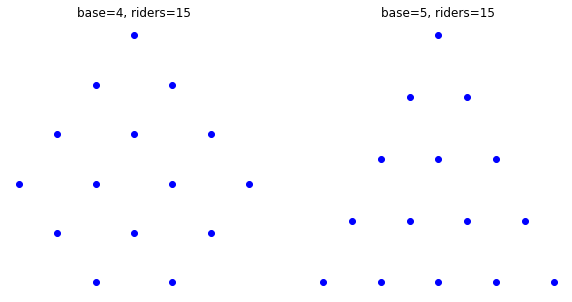

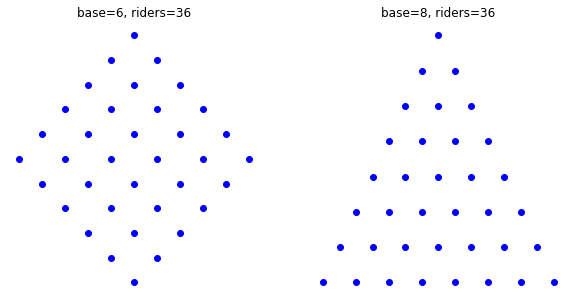

In [201]:
solve_p1()

# Part 2 (extra credit)

For Extra Credit, find the fewest number of riders needed so that there are three distinct formations between triangle and a rhombus.

We'll be able to find the solution without coding any more logic

In [208]:
def solve_p2():
    nb_solutions = 0
    current_nb_dots = 14
    while not nb_solutions:  # infinite loop if no solution, but here we are told there's one
        if has_n_formations(current_nb_dots, 3):
            nb_solutions += 1
        current_nb_dots += 1  

141 riders is a solution with 3 formations


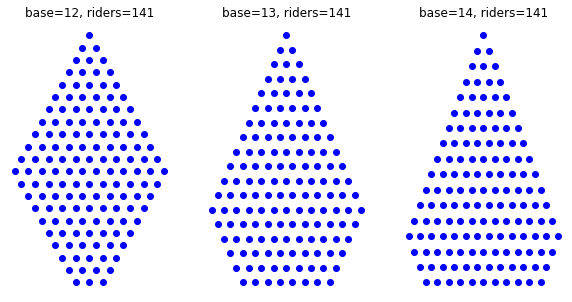

In [202]:
solve_p2()

**141 is the smallest solution**; FWIW it looks like a prime but is divisible by 3